In [1]:
import pandas as pd
import pickle
import plotly.express as px
import os
import pycountry
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pycountry
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import sys
import scipy.stats as stats


In [ ]:
base_dir = '/home/reutme/Big_data/final_project'
code_dir = os.path.join(base_dir, 'code')
sys.path.append(code_dir)
import const
import params

## EDA

### War information 

In [11]:
def get_country_name(code):
    try:
        return pycountry.countries.lookup(code).name
    except LookupError:
        return code 

In [12]:
merged_wars_data_file = os.path.join(const.data_base_dir, "merged_war_data_after_expand.csv")
war_merged_data = pd.read_csv(merged_wars_data_file)
war_merged_data.shape
war_merged_data = war_merged_data.dropna()
war_merged_data = war_merged_data.drop_duplicates()
print(war_merged_data.shape)
war_merged_data.head()

(6492, 9)


Year Country Code  Min_Year  Max_Year       Date      War Name  \
0  1939           US      1939      1945  1939–1945  World War II   
1  1939           SU      1939      1945  1939–1945  World War II   
2  1939           GB      1939      1945  1939–1945  World War II   
3  1939           CN      1939      1945  1939–1945  World War II   
4  1939           FR      1939      1945  1939–1945  World War II   

                      Combatants Location  \
0  Allied Powers vs. Axis Powers   Global   
1  Allied Powers vs. Axis Powers   Global   
2  Allied Powers vs. Axis Powers   Global   
3  Allied Powers vs. Axis Powers   Global   
4  Allied Powers vs. Axis Powers   Global   

                              Countries Participants  
0  United States, Soviet Union, United Kingdom, C...  
1  United States, Soviet Union, United Kingdom, C...  
2  United States, Soviet Union, United Kingdom, C...  
3  United States, Soviet Union, United Kingdom, C...  
4  United States, Soviet Union, United Kingdom, C...

In [13]:
# Extract unique values from the 'year' column that are greater than 1950
unique_years_filtered = war_merged_data[war_merged_data['Year'] > 1950]['Year'].unique()

# Sort the filtered unique years
unique_years_sorted = sorted(unique_years_filtered)

# Print the results
print(unique_years_sorted)

[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


Filter from year 1950

In [14]:
war_merged_data = war_merged_data[war_merged_data['Year'] > 1950]

In [37]:
# Count occurrences of each country code
country_counts = war_merged_data['Country Code'].value_counts()
country_counts.columns = ['Country Code', 'Frequency']  # Rename columns

country_counts_dict = country_counts.to_dict()


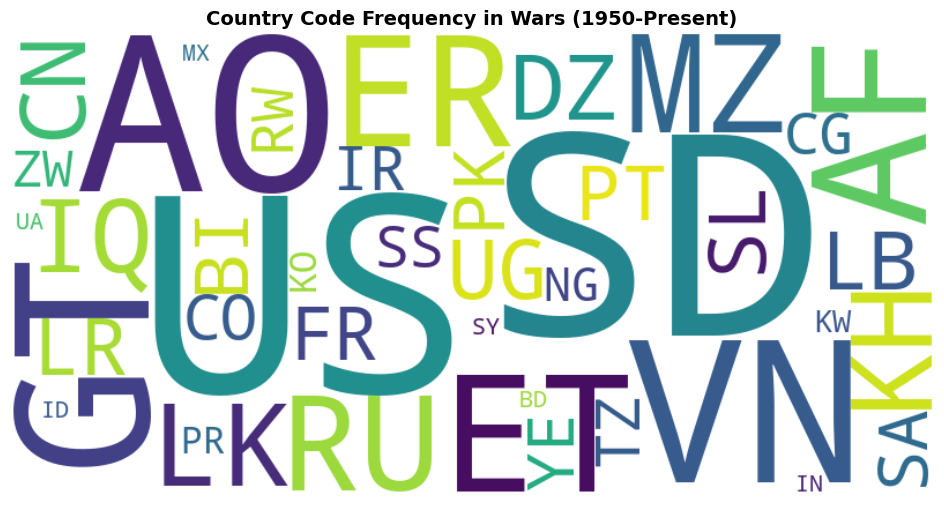

In [6]:

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(country_counts_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis
plt.title("Country Code Frequency in Wars (1950-Present)", fontsize=14, fontweight='bold')
plt.show()

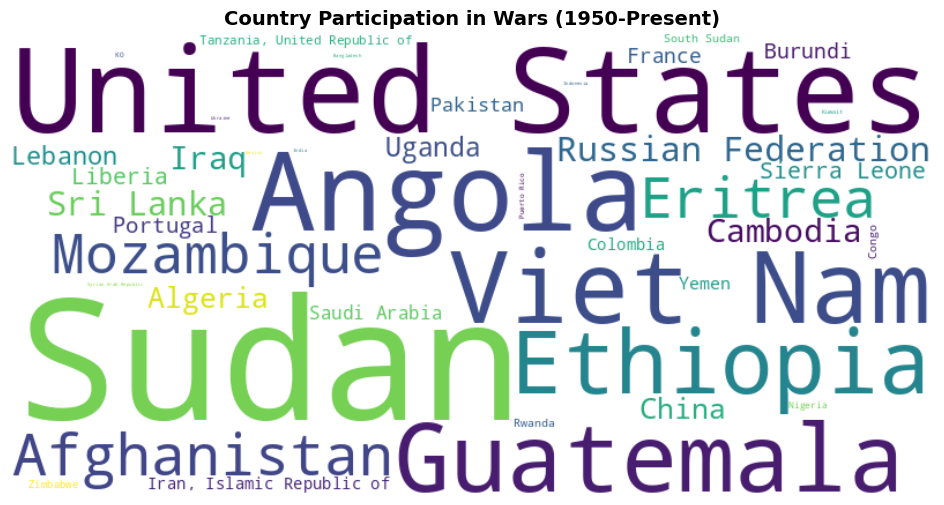

In [7]:
def get_country_name(code):
    try:
        return pycountry.countries.lookup(code).name
    except LookupError:
        return code 

# Apply the conversion function to replace codes with names
war_merged_data['Country Name'] = war_merged_data['Country Code'].apply(get_country_name)

# Count occurrences of each country
country_full_names = war_merged_data['Country Name'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(country_full_names.to_dict())

# Plot the Word Cloud
plt.figure(figsize=(18, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis
plt.title("Country Participation in Wars (1950-Present)", fontsize=14, fontweight='bold')
plt.show()

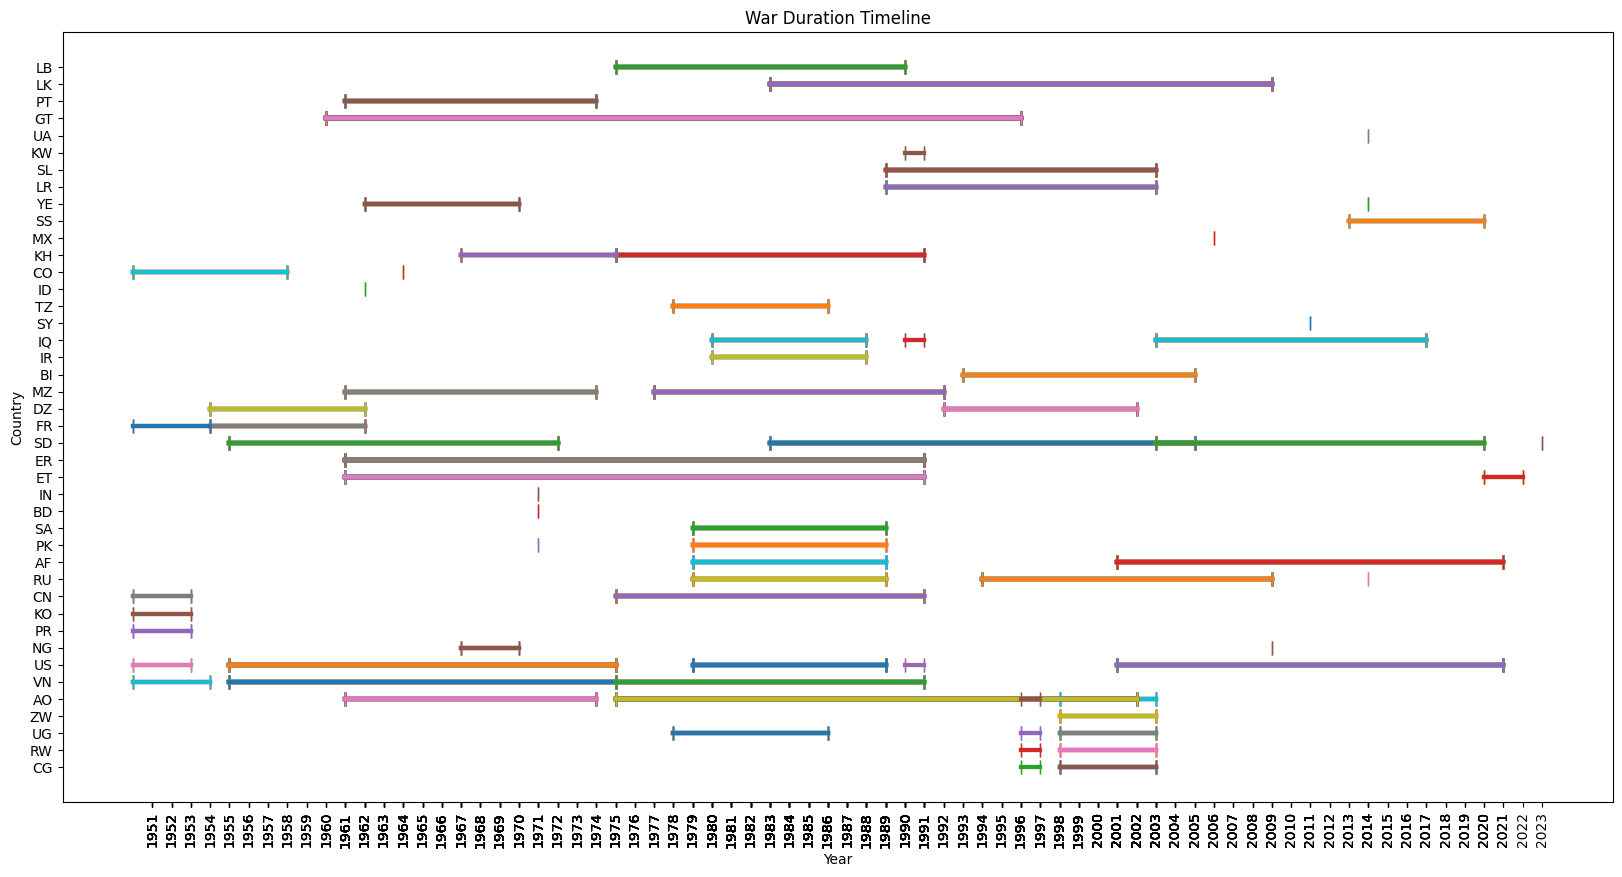

In [29]:
def plot_war_timeline(df):
    y_positions = {country: i for i, country in enumerate(df['Country Code'].unique())}

    fig, ax = plt.subplots(figsize=(20, 10))
    
    for _, row in df.iterrows():
        y_pos = y_positions[row['Country Code']]
        ax.plot([max(row['Min_Year'], 1950), row['Max_Year']], [y_pos, y_pos], marker='|', markersize=10, linewidth=3)
    
    ax.set_yticks(list(y_positions.values()))
    ax.set_yticklabels(list(y_positions.keys()))
    ax.set_xlabel('Year')
    plt.xticks(df['Year'], rotation=90)  # Show all years clearly
    ax.set_ylabel('Country')
    ax.set_title('War Duration Timeline')
    plt.show()

# Define countries and their y-axis positions
war_merged_data = war_merged_data[war_merged_data['Year'] > 1950]
plot_war_timeline(war_merged_data)

In [32]:

# Apply the conversion function to replace codes with names
war_merged_data['Country Name'] = war_merged_data['Country Code'].apply(get_country_name)

# Count occurrences of each country code
country_counts = war_merged_data['Country Code'].value_counts().reset_index()
country_counts.columns = ['Country Code', 'Frequency']  # Rename columns

# Add a column for full country name
country_counts['Country Name'] = country_counts['Country Code'].apply(get_country_name)
country_counts["Country Label"] = country_counts["Country Code"] + " - " + country_counts["Country Name"]

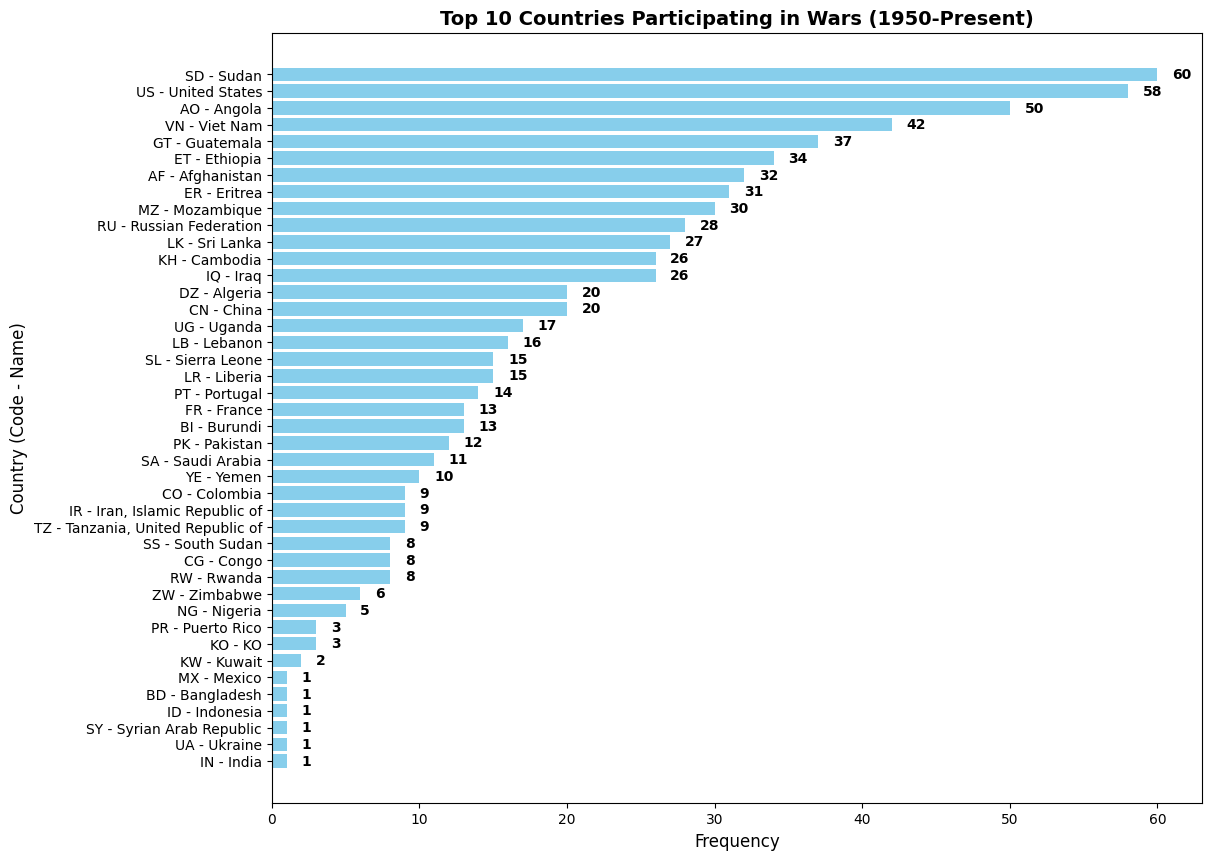

In [53]:
# Plot bar chart
plt.figure(figsize=(12, 10))
plt.barh(country_counts["Country Label"], country_counts["Frequency"], color='skyblue')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Country (Code - Name)", fontsize=12)
plt.title("Top 10 Countries Participating in Wars (1950-Present)", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Show values on bars
for index, value in enumerate(country_counts["Frequency"]):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()

### Authors data

In [5]:
input_dir = os.path.join(const.data_base_dir, "processed_chunks_combine_war_openalex")

In [4]:
year = 2000
pickle_file = f'year_{year}.pkl'
# Read the pickle file into a DataFrame
file_path = os.path.join(input_dir, pickle_file)
df = pd.read_pickle(file_path)

In [5]:
df.head()

author_name  publication_year                    institution_name  \
0  Bruno Van Mele              2000          Vrije Universiteit Brussel   
1      H. Hamouda              2000   Laboratoire de Physique Théorique   
2     D. Saifaoui              2000   Laboratoire de Physique Théorique   
3       H. Lassri              2000  University of Hassan II Casablanca   
4   A. Morbidelli              2000      Observatoire de la Côte d’Azur   

  country_code  war_exist  year_in_war war_name  
0           BE          0            0   No War  
1           FR          0            0   No War  
2           FR          0            0   No War  
3           MA          0            0   No War  
4           FR          0            0   No War

### Process migration by country code

In [2]:

# Function to convert ISO-2 to ISO-3
def iso2_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except AttributeError:
        return None


In [3]:
def process_authors_data(input_dir, year_min=1980, year_max=2000, country_list=None):
    """
    Process war data from pickle files in the given directory and normalize by the average number of authors per country.
    Allows filtering by a specific list of country codes.

    Args:
        input_dir (str): Directory where yearly pickle files are stored.
        iso_conversion_func (function): Function to convert 2-letter ISO codes to 3-letter ISO codes.
        war (int): 1 for war exist, 0 for no war.
        year_min (int): Minimum year to process.
        year_max (int): Maximum year to process.
        country_list (list, optional): List of country codes to filter by (default: None, meaning all countries).

    Returns:
        pd.DataFrame: DataFrame with war counts normalized by the average number of authors per country.
    """

    all_authors_data = []  # List to store total authors per country per year

    for year in range(year_min + 1, year_max + 1):
        print(f"start with year {year}")
        pickle_file = f'year_{year}.pkl'
        file_path = os.path.join(input_dir, pickle_file)

        # Read only 'publication_year' and 'country_code' columns
        df = pd.read_pickle(file_path)

        # Filter based on country list (if provided)
        if country_list is not None:
            df = df[df["country_code"].isin(country_list)]

        # Group by publication year and country, keeping war-related columns
        grouped_df = df.groupby(["publication_year", "country_code"]).agg(
            authors_count=("publication_year", "count"),
            war_exist=("war_exist", "first"),  # If any record has war_exist=1, keep it
            year_in_war=("year_in_war", "first"),  # Keep max value for war duration
            war_name=("war_name", lambda x: ', '.join(x.unique()))  # Keep unique war names
        ).reset_index()

        all_authors_data.append(grouped_df)
        print(f"Finished processing year {year}.")

    # Combine all years into a single DataFrame
    author_data = pd.concat(all_authors_data, ignore_index=True)

    author_data["country_code_3"] = author_data["country_code"].apply(iso2_to_iso3)
    avg_authors_per_country = author_data.groupby("country_code")["authors_count"].mean().reset_index()
    avg_authors_per_country.columns = ["country_code", "avg_authors"]
    # Sort values for better visualization
    avg_authors_per_country = avg_authors_per_country.sort_values(by="avg_authors", ascending=False)

    author_data = author_data.merge(avg_authors_per_country, on="country_code", how="left")
    author_data["normalized_authors_count"] = author_data["authors_count"] / author_data["avg_authors"]

    author_data = author_data.sort_values(by=["publication_year", "country_code"]).reset_index(drop=True)

    return author_data, avg_authors_per_country


In [6]:
author_data, avg_authors_per_country = process_authors_data(input_dir, year_min=1950, year_max=2022)


start with year 1951
Finished processing year 1951.
start with year 1952
Finished processing year 1952.
start with year 1953
Finished processing year 1953.
start with year 1954
Finished processing year 1954.
start with year 1955
Finished processing year 1955.
start with year 1956
Finished processing year 1956.
start with year 1957
Finished processing year 1957.
start with year 1958
Finished processing year 1958.
start with year 1959
Finished processing year 1959.
start with year 1960
Finished processing year 1960.
start with year 1961
Finished processing year 1961.
start with year 1962
Finished processing year 1962.
start with year 1963
Finished processing year 1963.
start with year 1964
Finished processing year 1964.
start with year 1965
Finished processing year 1965.
start with year 1966
Finished processing year 1966.
start with year 1967
Finished processing year 1967.
start with year 1968
Finished processing year 1968.
start with year 1969
Finished processing year 1969.
start with y

In [9]:
author_data.head(5)

publication_year country_code  authors_count  war_exist  year_in_war  \
0              1951           AM             53          0            0   
1              1951           AR             82          0            0   
2              1951           AT            722          0            0   
3              1951           AU            898          0            0   
4              1951           AZ              1          0            0   

  war_name country_code_3    avg_authors  normalized_authors_count  
0   No War            ARM     909.708333                  0.058260  
1   No War            ARG   20341.041667                  0.004031  
2   No War            AUT   25372.388889                  0.028456  
3   No War            AUS  105046.638889                  0.008549  
4   No War            AZE     863.222222                  0.001158

In [7]:
# with open(os.path.join(const.data_base_dir, "authors_data_count_by_country_code.pkl"), "wb") as file:
#     pickle.dump(author_data, file)

#### Plot the mean authors per country

/tmp/ipykernel_782744/1347687682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_counts_top["log_mean_count"] = np.log1p(mean_counts_top["avg_authors"])  # log(1 + x) to avoid log(0) issues


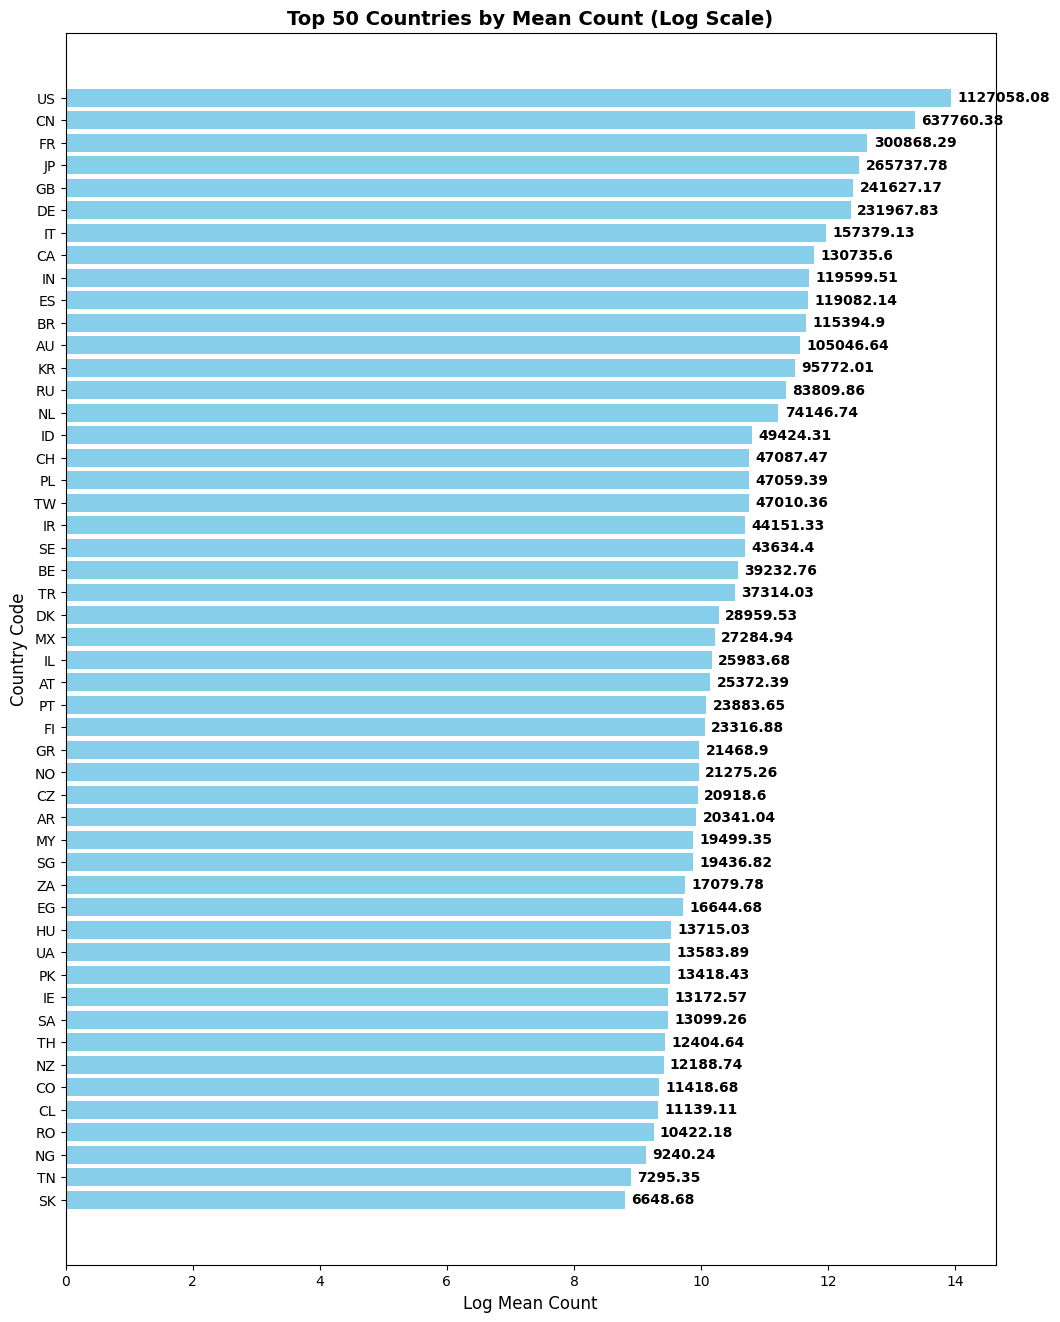

In [19]:
mean_counts=avg_authors_per_country

# Select top 30 countries with the highest mean counts
# mean_counts_top = mean_counts
top_n = 50
mean_counts_top = mean_counts.head(top_n)

# Apply Log Scale Transformation for better visualization
mean_counts_top["log_mean_count"] = np.log1p(mean_counts_top["avg_authors"])  # log(1 + x) to avoid log(0) issues

# Plot bar chart for mean counts per country (log scale)
plt.figure(figsize=(12,16))
plt.barh(mean_counts_top["country_code"], mean_counts_top["log_mean_count"], color='skyblue')
plt.xlabel("Log Mean Count", fontsize=12)
plt.ylabel("Country Code", fontsize=12)
plt.title(f"Top {top_n} Countries by Mean Count (Log Scale)", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

# Show values on bars
for index, value in enumerate(mean_counts_top["log_mean_count"]):
    plt.text(value + 0.1, index, f"{round(np.expm1(value), 2)}", va='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()

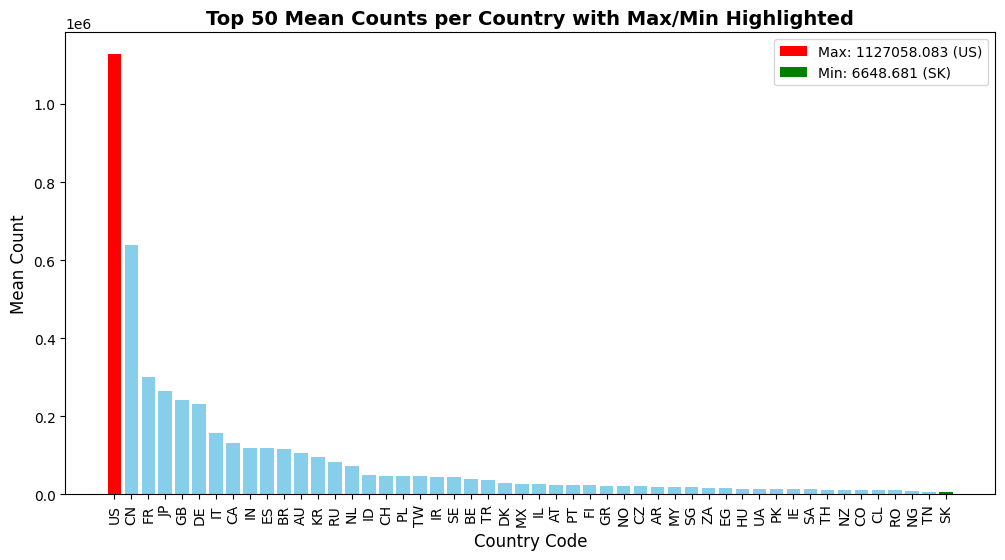

In [155]:
max_value = mean_counts_top["avg_authors"].max()
max_country = mean_counts_top.loc[mean_counts_top["avg_authors"] == max_value, "country_code"].values[0]

min_value = mean_counts_top["avg_authors"].min()
min_country = mean_counts_top.loc[mean_counts_top["avg_authors"] == min_value, "country_code"].values[0]

# Plot bar chart for mean counts per country
plt.figure(figsize=(12, 6))
plt.bar(mean_counts_top["country_code"], mean_counts_top["avg_authors"], color='skyblue')

# Highlight max and min values
plt.bar(max_country, max_value, color='red', label=f"Max: {max_value:.3f} ({max_country})")
plt.bar(min_country, min_value, color='green', label=f"Min: {min_value:.3f} ({min_country})")

# Labels and title
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Mean Count", fontsize=12)
plt.title("Top 50 Mean Counts per Country with Max/Min Highlighted", fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()

### Filter openAlex data by war data

In [15]:
country_counts = war_merged_data['Country Code'].value_counts()
country_counts.columns = ['Country Code', 'Frequency']  # Rename columns
top_countries = country_counts.head(15)
top_countries_named = [code for code, count in top_countries.items()]
print(top_countries_named)

['SD', 'US', 'AO', 'VN', 'GT', 'ET', 'AF', 'ER', 'MZ', 'RU', 'LK', 'KH', 'IQ', 'DZ', 'CN']


In [16]:
grouped_data = author_data[author_data['country_code'].isin(top_countries_named)]

In [33]:
print(grouped_data.shape)
grouped_data.head()

(1000, 10)


publication_year country_code  authors_count  war_exist  year_in_war  \
22              1951           CN            170          1            0   
32              1951           DZ              3          0            0   
44              1951           GT              3          0            0   
54              1951           IQ              1          0            0   
61              1951           KH              1          0            0   

      war_name country_code_3    avg_authors  normalized_authors_count  \
22  Korean War            CHN  637760.375000                  0.000267   
32      No War            DZA    4646.084507                  0.000646   
44      No War            GTM     314.263889                  0.009546   
54      No War            IRQ    2840.958333                  0.000352   
61      No War            KHM     432.774648                  0.002311   

   scale_category  
22   Medium-Small  
32          Small  
44          Small  
54          Small  
61          Small

In [34]:
def categorize_authors_count(df):
    """
    Categorizes authors_count into four groups: Small, Medium-Small, Medium, and Large.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing 'authors_count'.

    Returns:
    pd.DataFrame: Updated DataFrame with a new column 'scale_category'.
    """

    # Compute quartiles for grouping
    q1, q2, q3 = df['avg_authors'].quantile([0.25, 0.5, 0.75]).values

    # Function to categorize each row without overlapping
    def categorize(value):
        if value < q1:
            return "Small"
        elif q1 <= value < q2:
            return "Medium-Small"
        elif q2 <= value < q3:
            return "Medium"
        else:
            return "Large"

    # Apply the categorization function
    df["scale_category"] = df["avg_authors"].apply(categorize)

    return df


In [35]:
df = categorize_authors_count(grouped_data)  # Apply categorization

df.head()

/tmp/ipykernel_799810/2712849089.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["scale_category"] = df["avg_authors"].apply(categorize)


publication_year country_code  authors_count  war_exist  year_in_war  \
22              1951           CN            170          1            0   
32              1951           DZ              3          0            0   
44              1951           GT              3          0            0   
54              1951           IQ              1          0            0   
61              1951           KH              1          0            0   

      war_name country_code_3    avg_authors  normalized_authors_count  \
22  Korean War            CHN  637760.375000                  0.000267   
32      No War            DZA    4646.084507                  0.000646   
44      No War            GTM     314.263889                  0.009546   
54      No War            IRQ    2840.958333                  0.000352   
61      No War            KHM     432.774648                  0.002311   

   scale_category  
22          Large  
32         Medium  
44          Small  
54         Medium  
61   Medium-Small

In [42]:
def plot_authors_heatmap(df, label_count=False, fig_size=(20,8), title_add="Country"):
    """
    Generates a heatmap showing the authors' count per country and publication year,
    with war periods marked using an 'X' symbol.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing:
        - 'country_code' (str): Country identifier
        - 'publication_year' (int): Year of publication
        - 'authors_count' (float): Number of authors
        - 'war_exist' (int): 1 if war occurred in that year/country, else 0

    Returns:
    None (Displays the heatmap)
    """

    # Pivot the data for the heatmap
    heatmap_data = df.pivot(index='country_code', columns='publication_year', values='authors_count')

    # Function to format cell annotations
    def format_cell(value, year, country):
        if pd.isna(value):
            return ""  # Leave blank if missing
        
        if label_count:
            rounded_value = f"{value:.0f}"  # Round to nearest whole number
        else: 
            rounded_value = ""

        # Get war_exist value for this country and year
        war_status = df[
            (df["publication_year"] == year) & (df["country_code"] == country)
        ]["war_exist"].values

        # Add a war marker if applicable
        if len(war_status) > 0 and war_status[0] == 1:
            if rounded_value == "":
                return "⚔️"
            return f"{rounded_value}\n ⚔️" # War indication
        else:
            return f"{rounded_value}"  # No war

    # Apply formatting for annotations
    heatmap_data_annot = heatmap_data.copy()
    for year in heatmap_data.columns:
        for country in heatmap_data.index:
            heatmap_data_annot.at[country, year] = format_cell(heatmap_data.at[country, year], year, country)

    # Set figure size
    plt.figure(figsize=fig_size)

    # Create the heatmap with formatted annotations
    sns.heatmap(
        heatmap_data, 
        cmap="YlGnBu", 
        linewidths=0.5, 
        cbar_kws={"shrink": 0.75, "label": "Number of Authors"},  # Add color bar label
        annot=heatmap_data_annot,  # Use formatted annotations
        fmt="",  # Required when using string-based annotations
        annot_kws={"size": 10}  # Adjust annotation font size
    )

    # Add a custom legend for war indication
    war_legend = mlines.Line2D([], [], color='black', marker='X', markersize=10, linestyle="None", label='War (X)')
    plt.legend(handles=[war_legend], loc='upper left', fontsize=12)

    # Improve axis label readability
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Labels and title
    plt.xlabel("Publication Year", fontsize=12)
    plt.ylabel("Country Code", fontsize=12)
    plt.title(f"Heatmap of Authors Count by Year and {title_add} (War Indicated)", fontsize=14)

    # Show the plot
    plt.show()

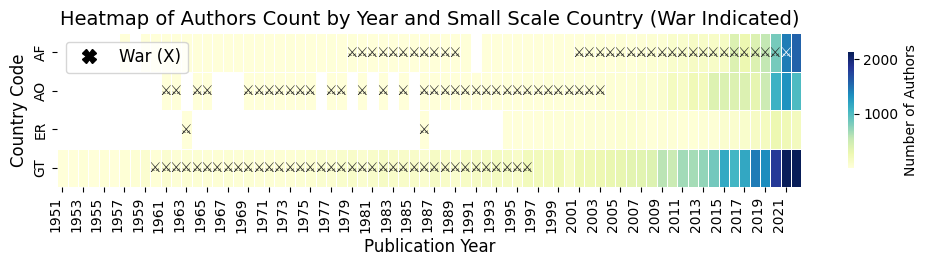

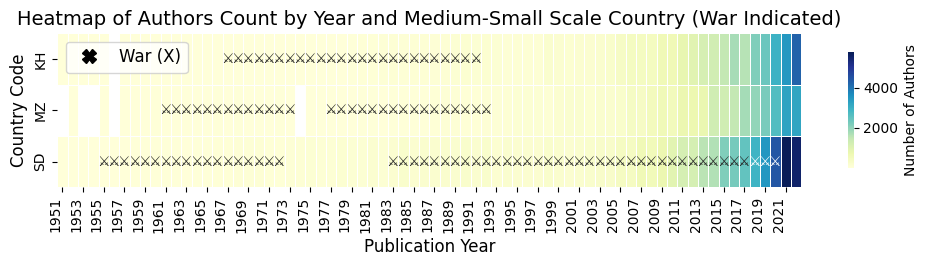

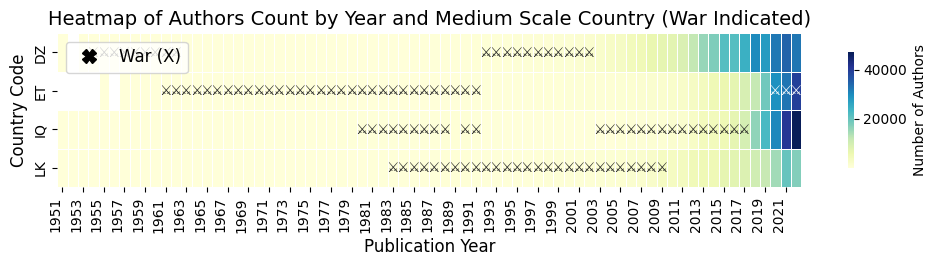

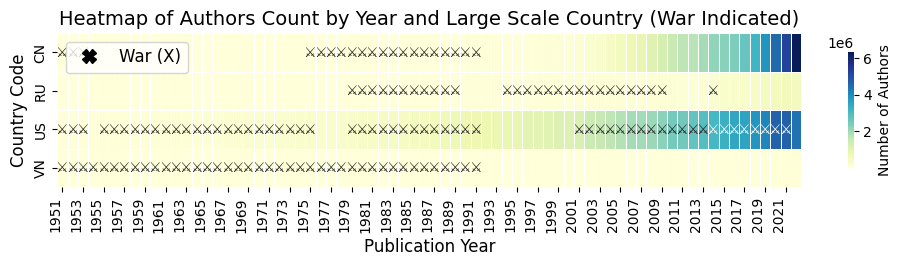

In [43]:
for category in ["Small", "Medium-Small", "Medium", "Large"]:
    group_df = grouped_data[grouped_data["scale_category"]==category]
    plot_authors_heatmap(group_df, fig_size=(12,2), title_add=f"{category} Scale Country")

In [187]:

def plot_country_yearly_data(df, country_code, column_name):
    """
    Plots the year-over-year data of a given column for a single country.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing 'country_code', 'publication_year', and the specified column.
    country_code (str): The country code to filter data for plotting.
    column_name (str): The column name for which the yearly data should be plotted.
    
    Returns:
    None (displays the plot)
    """
    # Filter the DataFrame for the specific country
    country_df = df[df['country_code'] == country_code]

    # Ensure the data is sorted by year
    country_df = country_df.sort_values(by='publication_year')

    # Create the plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=country_df, x='publication_year', y=column_name, color='gray', marker='o', linewidth=2)

    # Color dots based on war status
    for _, row in country_df.iterrows():
        plt.scatter(row['publication_year'], row[column_name], 
                    color='green' if row['war_exist'] == 0 else 'red', s=50)

    # Titles and labels
    plt.title(f"{column_name} Over Time in {country_code}")
    plt.xlabel("Year")
    plt.ylabel(column_name)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Add legend for war status
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='No War'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='War Exist')
    ]
    plt.legend(handles=handles, title="War Status", loc='upper left')

    # Show the plot
    plt.show()


In [176]:


def plot_yearly_data(df, column_name):
    """
    Plots the year-over-year difference of a given column for each country in a grid of subplots.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing 'country_code', 'year', and the specified column.
    column_name (str): The column name for which the yearly difference should be calculated.
    
    Returns:
    None (displays the plots)
    """
    # Ensure the data is sorted by year within each country
    df = df.sort_values(by=['country_code', 'publication_year'])

    # Get the unique country codes
    countries = df['country_code'].unique()
    num_countries = len(countries)

    # Define the grid size (adjust rows and columns dynamically)
    cols = 5  # Number of columns in the grid
    rows = int(np.ceil(num_countries / cols))  # Calculate number of rows needed

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten in case of multiple rows

    # Loop through each country and create its subplot
    for i, country in enumerate(countries):
        ax = axes[i]  # Select subplot
        country_df = df[df['country_code'] == country]

        # Plot differential column
        sns.lineplot(data=country_df, x='publication_year', y=column_name, color='gray', marker='o', linewidth=2, ax=ax)

        # Color dots based on war status
        for _, row in country_df.iterrows():
            ax.scatter(row['publication_year'], row[column_name], color='green' if row['war_exist'] == 0 else 'red', s=50)

        
        # ax.set_ylim(country_df[column_name].min(), country_df[column_name].max())

        # Titles and labels
        ax.set_title(f"authors ({country})")
        ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [115]:
df = grouped_data.copy()


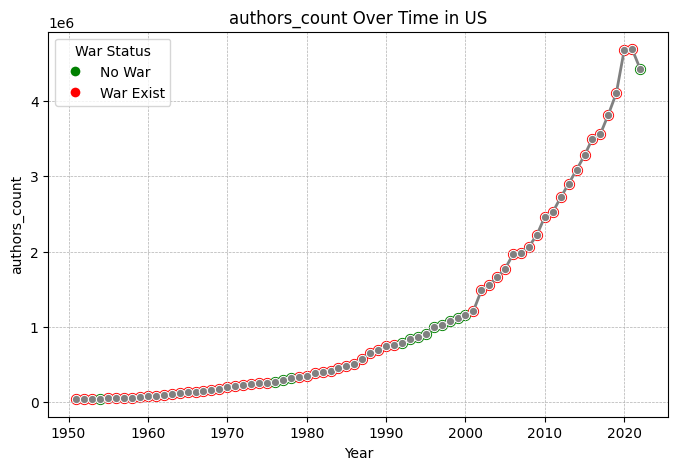

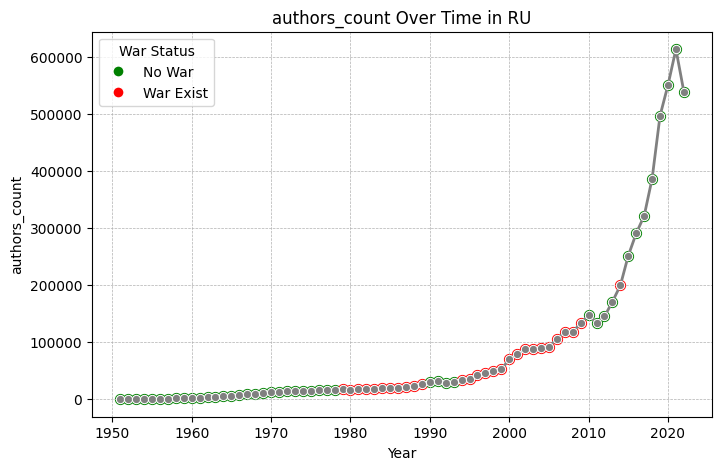

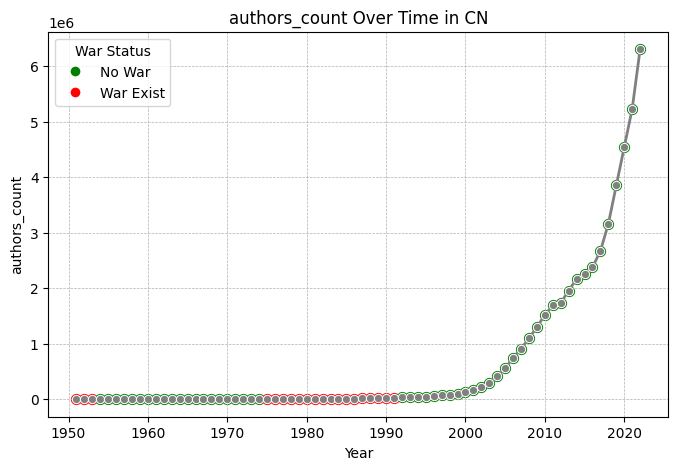

In [194]:
plot_country_yearly_data(df, 'US', 'authors_count')
plot_country_yearly_data(df, 'RU', 'authors_count')
plot_country_yearly_data(df, 'CN', 'authors_count')

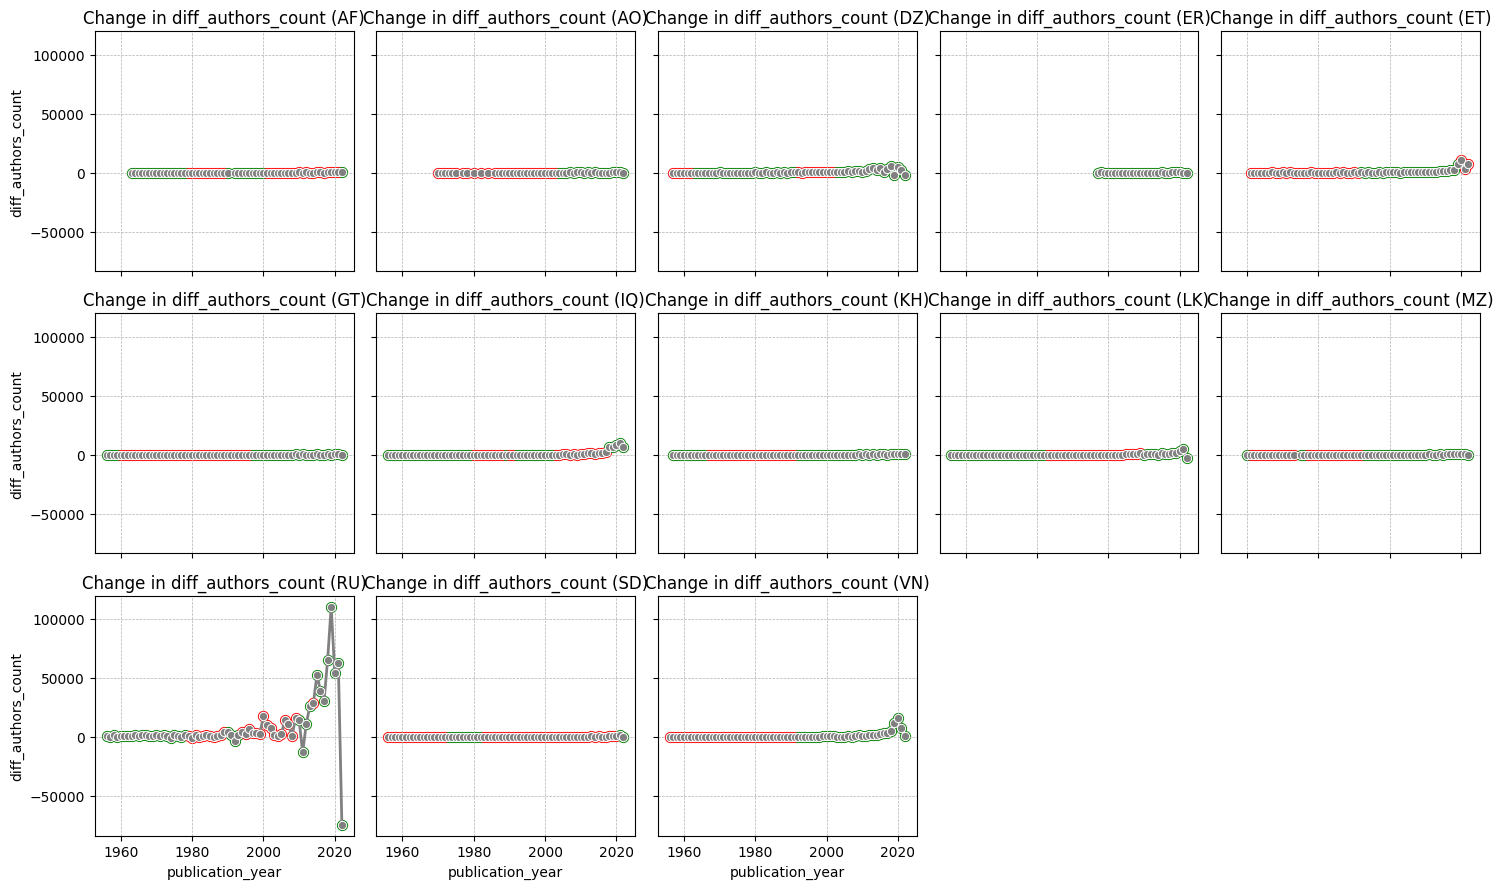

In [172]:
# Compute the difference in war count from the previous year per country
df['diff_authors_count'] = df.groupby('country_code')['authors_count'].diff()
df = df.dropna()

plot_yearly_data(df, 'diff_authors_count')

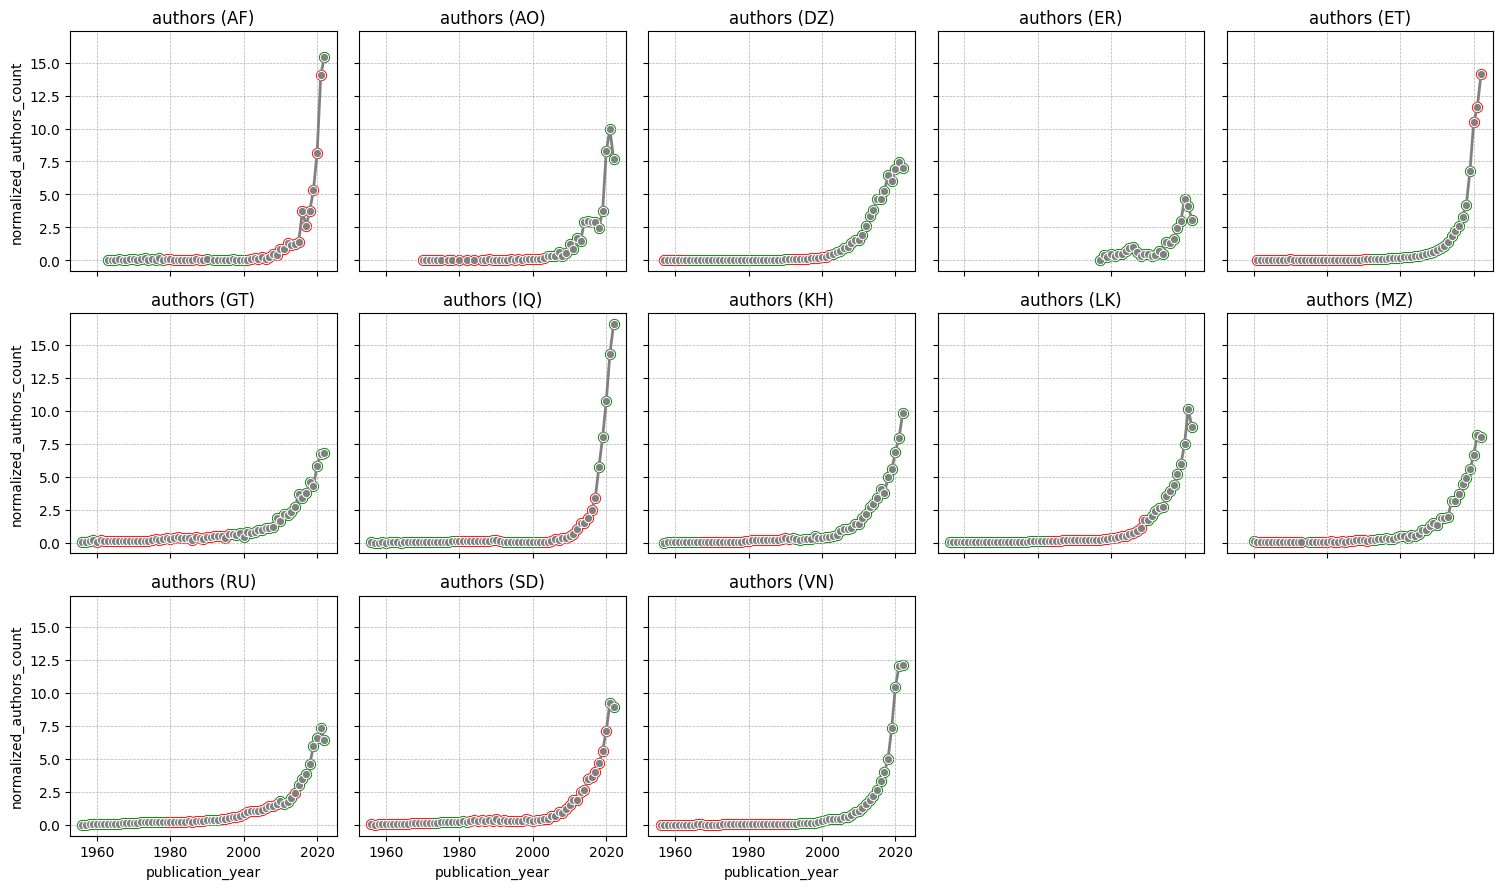

In [177]:
plot_yearly_data(df, 'normalized_authors_count')

In [117]:
def calculate_correlation(df):
    """
    Calculates Pearson and Spearman correlation between 'publication_year' and 'authors_count' for each country.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing 'country_code', 'publication_year', and 'authors_count'.
    
    Returns:
    pd.DataFrame: A DataFrame containing Pearson and Spearman correlation coefficients for each country.
    """
    # Ensure the data is sorted by year
    df = df.sort_values(by=['country_code', 'publication_year'])

    # Group by country and compute Pearson & Spearman correlations
    correlation_results = df.groupby("country_code").apply(
        lambda x: pd.Series({
            "pearson_corr": x["publication_year"].corr(x["authors_count"]),
            "spearman_corr": stats.spearmanr(x["publication_year"], x["authors_count"])[0]  # Extracts Spearman correlation value
        })
    ).reset_index()

    return correlation_results

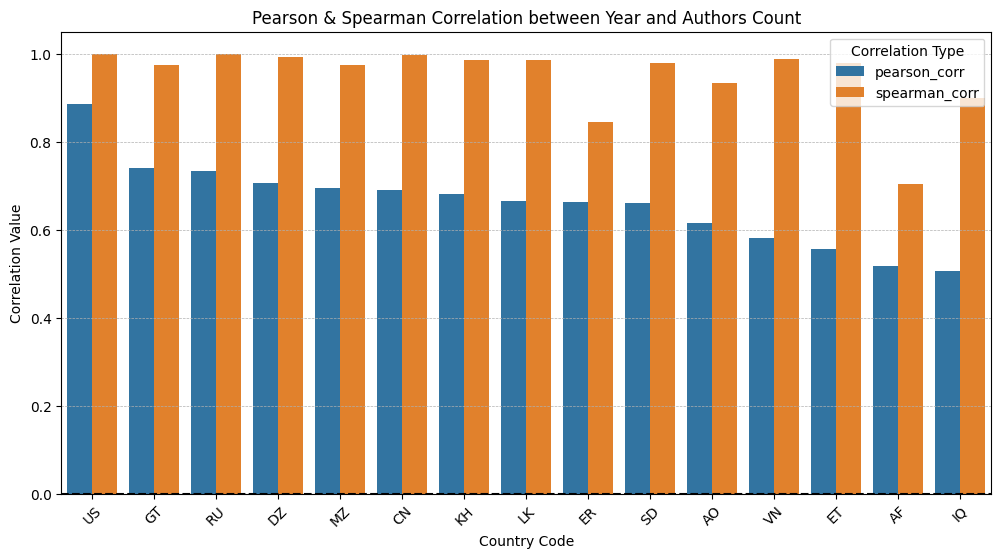

In [119]:
correlation_df = calculate_correlation(df)
plt.figure(figsize=(12, 6))
correlation_df = correlation_df.sort_values(by="pearson_corr", ascending=False)

# Plot both Pearson and Spearman correlations
sns.barplot(data=correlation_df.melt(id_vars="country_code", var_name="Correlation Type", value_name="Correlation Value"),
            x="country_code", y="Correlation Value", hue="Correlation Type")

# Labels and title
plt.xlabel("Country Code")
plt.ylabel("Correlation Value")
plt.title("Pearson & Spearman Correlation between Year and Authors Count")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle="--")  # Add a horizontal line at y=0 for reference
plt.legend(title="Correlation Type")
plt.grid(axis="y", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

## Analysis

In [120]:
grouped_data

publication_year country_code  authors_count  war_exist  year_in_war  \
22                 1951           CN            170          1            0   
32                 1951           DZ              3          0            0   
44                 1951           GT              3          0            0   
54                 1951           IQ              1          0            0   
61                 1951           KH              1          0            0   
...                 ...          ...            ...        ...          ...   
13639              2022           MZ           3206          0            0   
13667              2022           RU         539421          0            0   
13672              2022           SD           5551          0            0   
13705              2022           US        4427080          0            0   
13712              2022           VN          60398          0            0   

         war_name country_code_3   avg_authors  normalized_authors_count  
22     Korean War            CHN  6.377604e+05                  0.000267  
32         No War            DZA  4.646085e+03                  0.000646  
44         No War            GTM  3.142639e+02                  0.009546  
54         No War            IRQ  2.840958e+03                  0.000352  
61         No War            KHM  4.327746e+02                  0.002311  
...           ...            ...           ...                       ...  
13639      No War            MOZ  3.996567e+02                  8.021884  
13667      No War            RUS  8.380986e+04                  6.436247  
13672      No War            SDN  6.235139e+02                  8.902769  
13705      No War            USA  1.127058e+06                  3.927996  
13712      No War            VNM  4.989556e+03                 12.104886  

[1000 rows x 9 columns]

In [6]:
df = pd.read_pickle(os.path.join(const.data_base_dir, "dataframe_grouped.pkl"))

# Verify the loaded data
print(df.head())


    publication_year country_code  authors_count  war_exist  year_in_war  \
22              1951           CN            170          1            0   
32              1951           DZ              3          0            0   
44              1951           GT              3          0            0   
54              1951           IQ              1          0            0   
61              1951           KH              1          0            0   

      war_name country_code_3    avg_authors  normalized_authors_count  
22  Korean War            CHN  637760.375000                  0.000267  
32      No War            DZA    4646.084507                  0.000646  
44      No War            GTM     314.263889                  0.009546  
54      No War            IRQ    2840.958333                  0.000352  
61      No War            KHM     432.774648                  0.002311  


In [8]:
fig = px.choropleth(
    df,
    locations="country_code_3",       # Match locations using the CountryCode
    color="authors_count",                 # The statistic to visualize
    hover_name="war_exist",      # Display country name on hover
    animation_frame="publication_year",        # Create animation over years
    title=f"Wars Over Time",
    color_continuous_scale=px.colors.sequential.YlGnBu,
    range_color=(df['authors_count'].min(), df['authors_count'].max())
)

fig.update_geos(fitbounds="locations")  # Center the map
fig.show()

In [206]:
# Save the DataFrame as a pickle file
df.to_pickle(os.path.join(const.data_base_dir, "dataframe_grouped.pkl"))

print("DataFrame saved successfully as 'dataframe.pkl'")


DataFrame saved successfully as 'dataframe.pkl'
